<a href="https://colab.research.google.com/github/pavanxk12/Option.strat/blob/main/Stock_Market_Prediction_Model_Creation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
start = '2012-01-01'
end = '2022-12-21'
stock = 'HDFCBANK.NS'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
data.reset_index(inplace=True)

In [ ]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-02,214.449997,214.899994,209.750000,213.425003,195.259415,3514998
1,2012-01-03,215.699997,220.449997,215.000000,219.574997,200.885925,3439238
2,2012-01-04,220.949997,222.475006,215.425003,221.649994,202.784332,4871478
3,2012-01-05,222.000000,223.350006,220.149994,221.824997,202.944427,3380606
4,2012-01-06,220.500000,228.574997,219.475006,226.649994,207.358749,3977222
...,...,...,...,...,...,...,...
2700,2022-12-14,1653.000000,1665.500000,1650.000000,1662.250000,1643.403564,7113820
2701,2022-12-15,1657.050049,1669.400024,1627.050049,1631.800049,1613.298950,9091324
2702,2022-12-16,1620.050049,1645.099976,1609.000000,1639.650024,1621.059814,7323979
2703,2022-12-19,1644.000000,1646.650024,1626.199951,1644.750000,1626.102051,4802271


In [ ]:
ma_100_days = data.Close.rolling(100).mean()

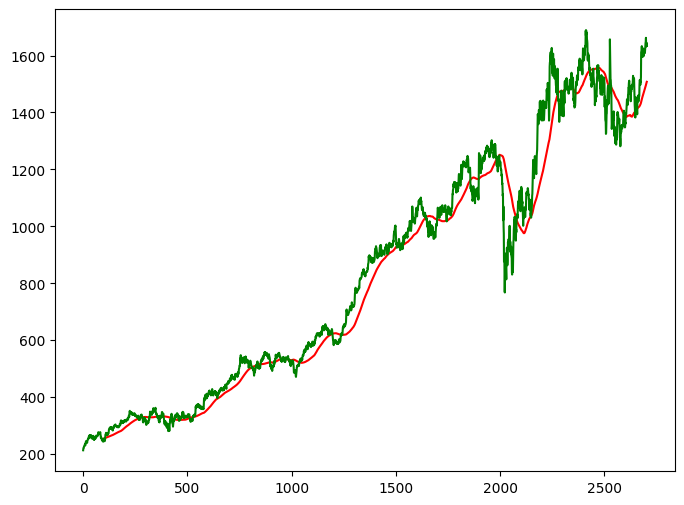

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [ ]:
ma_200_days = data.Close.rolling(200).mean()

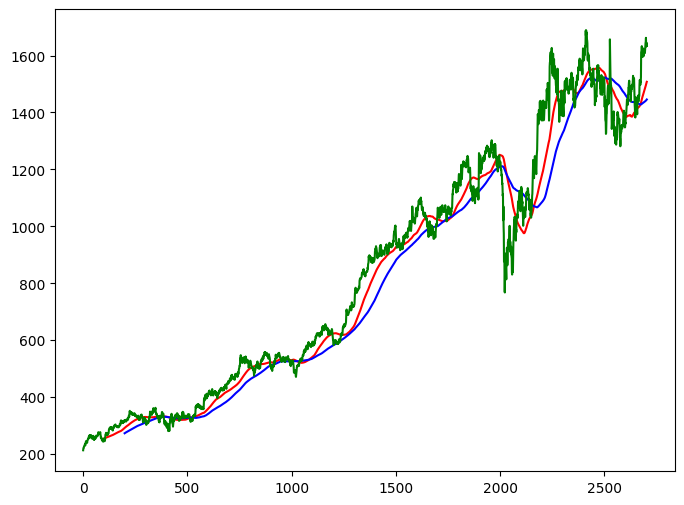

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [ ]:
data.dropna(inplace=True)

In [ ]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [ ]:
data_train.shape[0]

2164

In [ ]:
data_test.shape[0]

541

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
data_train_scale = scaler.fit_transform(data_train)

In [ ]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])


In [ ]:
x, y = np.array(x), np.array(y)

In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
# model.fit(x,y, epochs = 10, batch_size =32, verbose =1)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [ ]:
pas_100_days = data_train.tail(100)

In [ ]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [ ]:
data_test_scale  =  scaler.fit_transform(data_test)

In [ ]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [ ]:
y_predict = model.predict(x)

17/17 [==============================] - 3s 116ms/step


In [ ]:
scale =1/scaler.scale_

In [ ]:
y_predict = y_predict*scale

In [ ]:
y = y*scale

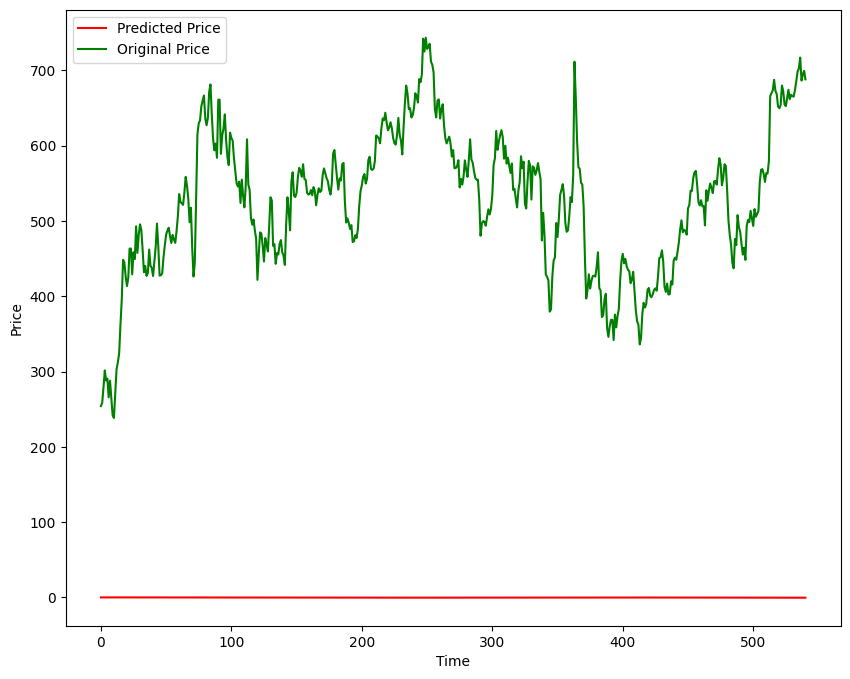

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
model.save('Stock Predictions Model.keras')

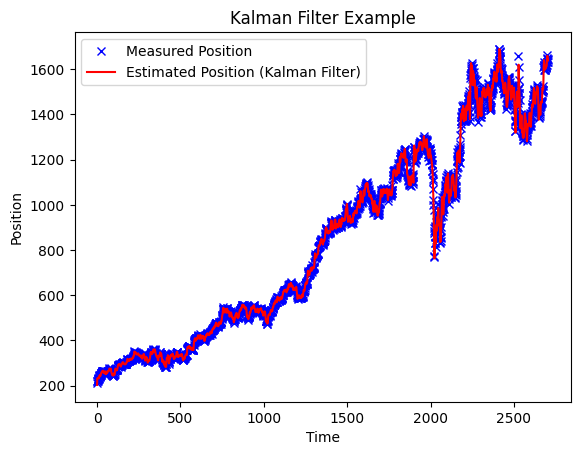

In [ ]:


# Define the Kalman Filter parameters
dt = 1.0  # Time step
# State transition matrix (predicts next state from current state)
A = np.array([[1, dt], [0, 1]])
# Observation matrix (maps true state to observed state)
H = np.array([[1, 0]])
# Process noise covariance matrix (system noise)
Q = np.array([[0.01, 0.01], [0.01, 0.01]])
# Measurement noise covariance matrix (sensor noise)
R = np.array([[0.1]])

# Initial state estimate
x_hat = np.array([[0], [0]])
# Initial error covariance matrix
P = np.eye(2)

# Load your own data array here
data1 = np.array(data.Close)

# Kalman Filter loop
estimated_positions = []
for z in data1:
    # Prediction step
    x_hat_minus = np.dot(A, x_hat)
    P_minus = np.dot(np.dot(A, P), A.T) + Q

    # Update step (Kalman Gain)
    K = np.dot(np.dot(P_minus, H.T), np.linalg.inv(np.dot(np.dot(H, P_minus), H.T) + R))

    # Measurement update
    x_hat = x_hat_minus + np.dot(K, (z - np.dot(H, x_hat_minus)))
    P = np.dot((np.eye(2) - np.dot(K, H)), P_minus)

    estimated_positions.append(x_hat[0, 0])

# Plotting
plt.plot(data1, 'bx', label='Measured Position')
plt.plot(estimated_positions, 'r-', label='Estimated Position (Kalman Filter)')
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Kalman Filter Example')
plt.legend()
plt.show()


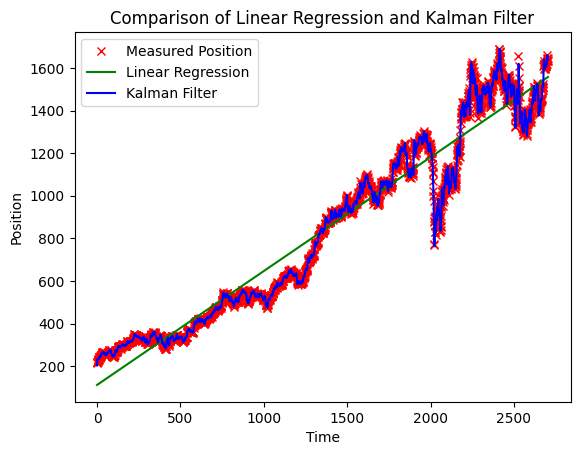

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Define the Kalman Filter parameters
dt = 1.0  # Time step
# State transition matrix (predicts next state from current state)
A = np.array([[1, dt], [0, 1]])
# Observation matrix (maps true state to observed state)
H = np.array([[1, 0]])
# Process noise covariance matrix (system noise)
Q = np.array([[0.01, 0.01], [0.01, 0.01]])
# Measurement noise covariance matrix (sensor noise)
R = np.array([[0.1]])

# Initial state estimate
x_hat = np.array([[0], [0]])
# Initial error covariance matrix
P = np.eye(2)

# Load your own data array here
data1 = np.array(data.Close)
time = np.arange(len(data1)).reshape(-1, 1)  # Time variable for linear regression

# Linear regression
reg = LinearRegression().fit(time, data1)
linear_regression_predictions = reg.predict(time)

# Kalman Filter loop
kalman_filter_predictions = []
for z in data1:
    # Prediction step
    x_hat_minus = np.dot(A, x_hat)
    P_minus = np.dot(np.dot(A, P), A.T) + Q

    # Update step (Kalman Gain)
    K = np.dot(np.dot(P_minus, H.T), np.linalg.inv(np.dot(np.dot(H, P_minus), H.T) + R))

    # Measurement update
    x_hat = x_hat_minus + np.dot(K, (z - np.dot(H, x_hat_minus)))
    P = np.dot((np.eye(2) - np.dot(K, H)), P_minus)

    kalman_filter_predictions.append(x_hat[0, 0])

# Plotting
plt.plot(data1, 'rx', label='Measured Position')
plt.plot(linear_regression_predictions, 'g-', label='Linear Regression')
plt.plot(kalman_filter_predictions, 'b-', label='Kalman Filter')
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Comparison of Linear Regression and Kalman Filter')
plt.legend()
plt.show()


normal distribution


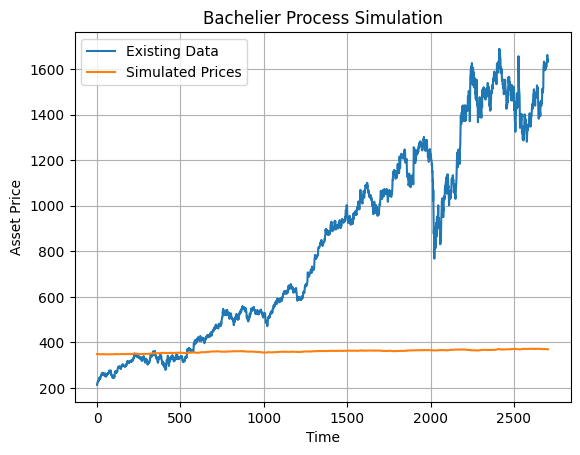

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def bachelier_process(data, mu, sigma):
    """
    Simulate the Bachelier process based on existing data.

    Parameters:
        data (array-like): Array of existing data (e.g., prices).
        mu (float): Drift rate.
        sigma (float): Volatility.

    Returns:
        array-like: Array of simulated asset prices.
    """
    # Time points
    time = np.arange(len(data))

    # Calculate the drift term
    drift_term = mu * time[-1]

    # Calculate the random fluctuations
    dW = np.random.normal(0, sigma, size=len(data))

    # Calculate the asset prices using the integral form of the Bachelier equation
    ST = data[0] + drift_term + np.cumsum(dW)

    return ST

# Existing data array
existing_data = np.array(data.Close)

# Parameters
mu = 0.05  # Drift rate
sigma = 0.2  # Volatility

# Simulate the Bachelier process based on existing data
simulated_prices = bachelier_process(existing_data, mu, sigma)

# Plot the simulated asset prices
plt.plot(existing_data, label='Existing Data')
plt.plot(simulated_prices, label='Simulated Prices')
plt.xlabel('Time')
plt.ylabel('Asset Price')
plt.title('Bachelier Process Simulation')
plt.legend()
plt.grid(True)
plt.show()


gaussian distribution

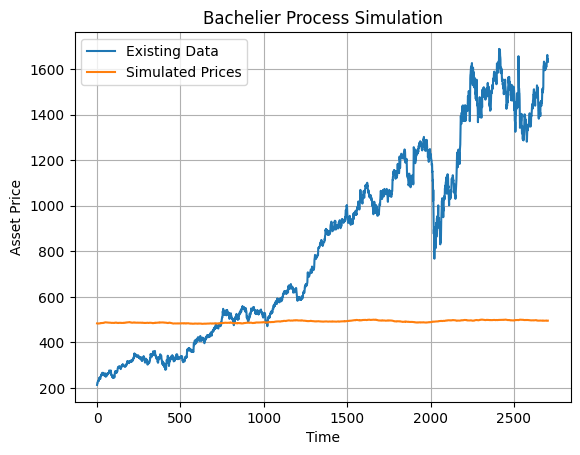

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def bachelier_process(data, mu, sigma):
    """
    Simulate the Bachelier process based on existing data.

    Parameters:
        data (array-like): Array of existing data (e.g., prices).
        mu (float): Drift rate.
        sigma (float): Volatility.

    Returns:
        array-like: Array of simulated asset prices.
    """
    # Time points
    time = np.arange(len(data))

    # Calculate the drift term
    drift_term = mu * time[-1]

    # Generate random increments using the Gaussian distribution
    dW = norm.rvs(loc=0, scale=sigma, size=len(data) - 1)

    # Calculate the cumulative sum of the random increments
    cumulative_dW = np.cumsum(dW)

    # Calculate the asset prices using the integral form of the Bachelier equation
    ST = data[0] + drift_term + cumulative_dW

    return ST

# Existing data array
existing_data = np.array(data.Close)

# Parameters
mu = 0.1  # Drift rate
sigma = 0.25  # Volatility

# Simulate the Bachelier process based on existing data
simulated_prices = bachelier_process(existing_data, mu, sigma)

# Plot the simulated asset prices
plt.plot(existing_data, label='Existing Data')
plt.plot(simulated_prices, label='Simulated Prices')
plt.xlabel('Time')
plt.ylabel('Asset Price')
plt.title('Bachelier Process Simulation')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np

# Generate sample data

data3=np.array(data.Close)-np.array(data.Open)
binary_data = np.where(data3 >= 0, 1, 0)
data2 = np.array(binary_data) # Sample data consisting of 0s and 1s

# Estimate transition probabilities
transition_matrix = np.zeros((2, 2))  # Initialize transition matrix
for i in range(len(data2) - 1):
    current_state = data2[i]
    next_state = data2[i + 1]
    transition_matrix[current_state, next_state] += 1

# Normalize transition probabilities
transition_matrix /= np.sum(transition_matrix, axis=1, keepdims=True)

# Predict next state
current_state = data2[-1]  # Current state is the last observed state in the data
next_state_probabilities = transition_matrix[current_state]
predicted_next_state = np.random.choice([0, 1], p=next_state_probabilities)
print("Predicted next state:", predicted_next_state)


Predicted next state: 0


In [ ]:
import numpy as np

# Sample data
# data2 = np.random.randint(2, size=100)  # Sample array of zeros and ones

# Prepare data sequences
sequences = [data2[i:i+2] for i in range(len(data2)-1)]

# Split sequences into past elements and next elements
past_sequences = [seq[:-1] for seq in sequences]
next_elements = [seq[-1] for seq in sequences]

# Train Markov model
num_states = 2  # Number of states (0 and 1)
transition_matrix = np.zeros((num_states, num_states))
for past, next_element in zip(past_sequences, next_elements):
    past_state = np.sum(past)
    next_state = next_element
    if past_state < num_states and next_state < num_states:
        transition_matrix[past_state, next_state] += 1

# Normalize transition matrix
transition_matrix /= np.sum(transition_matrix, axis=1, keepdims=True)

# Predict next element for each sequence
predicted_next_elements = [np.argmax(transition_matrix[np.sum(seq), :]) for seq in past_sequences]

# Evaluate predictions
accuracy = np.mean(np.array(predicted_next_elements) == np.array(next_elements))
print("Accuracy:", accuracy)


Accuracy: 0.5099852071005917


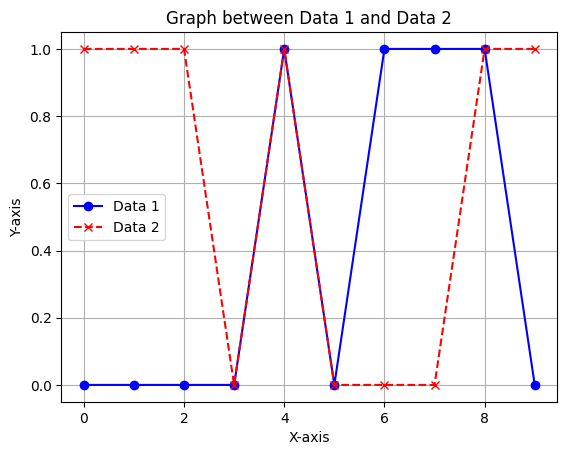

<Figure size 10000x60000 with 0 Axes>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
x = np.arange(10)  # Sample x-values
y1 = predicted_next_elements[11:21] # Sample y-values for the first dataset
y2 = next_elements[11:21] # Sample y-values for the second dataset

# Plot
plt.plot(x, y1, label='Data 1', marker='o', linestyle='-', color='b')
plt.plot(x, y2, label='Data 2', marker='x', linestyle='--', color='r')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Graph between Data 1 and Data 2')

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.figure(figsize=(100, 600))
plt.show()


In [ ]:
data=data[['Date','Close']]


In [ ]:
data.columns=['ds','y']

,Date,Close
0,2012-01-02,213.425003
1,2012-01-03,219.574997
2,2012-01-04,221.649994
3,2012-01-05,221.824997
4,2012-01-06,226.649994
...,...,...
2700,2022-12-14,1662.250000
2701,2022-12-15,1631.800049
2702,2022-12-16,1639.650024
2703,2022-12-19,1644.750000


In [ ]:
pip install pystan numpy pandas matplotlib cmdstanpy


In [ ]:
git clone https://github.com/facebook/prophet.git
cd prophet
pip install .


SyntaxError: invalid syntax (<ipython-input-58-b03adc860db6>, line 1)

In [ ]:

from fbprophet import Prophet
model = Prophet()

# Fit the model to the data
model.fit(data)

# Make future predictions
future = model.make_future_dataframe(periods=365)  # Forecast for 1 year into the future
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)

SyntaxError: invalid syntax (<ipython-input-56-000a1e27cc01>, line 1)